In [1]:
import pandas as pd
import numpy as np
import os
import glob
import sys

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import seaborn as sns

import src.utils as my_u
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

file_list = glob.glob("./dataset/xin/RAW/data.txt")
print(file_list)

['./dataset/xin/RAW/data.txt']


In [2]:
LABEL = 'cell.type'

total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0)
    total_data = total_data.append(data)
    print(total_data.shape)

gene_anno = pd.read_csv('./dataset/xin/RAW/human_gene_annotation.csv', sep=",", index_col=0)

total_data = pd.concat([gene_anno, total_data], axis=1)
total_data.set_index('symbol', inplace=True)


labels = pd.read_csv('./dataset/xin/RAW/human_islet_cell_identity.txt', sep='\t', index_col=0)
labels = labels[LABEL]

#total_data = total_data.iloc[:,1:]
#total_data.columns = [k.split(".")[1] for k in total_data.columns]

total_data = total_data.append(labels)
total_data=total_data.transpose()
#print(total_data)

labels = total_data[LABEL].values.tolist()
total_data.pop(LABEL)
total_data = total_data.astype('float32')
print(total_data)

(39851, 1600)
symbol            A1BG      A2M  A2MP1        NAT1  NAT2  AACP    SERPINA3  \
Sample_1     47.339600   0.0000    0.0    0.000000   0.0   0.0    0.000000   
Sample_2     24.045799   0.0000    0.0    0.000000   0.0   0.0   14.042500   
Sample_3      2.274300   0.0000    0.0    0.000000   0.0   0.0    0.841200   
Sample_4      0.000000   0.0000    0.0    0.000000   0.0   0.0    0.000000   
Sample_5      0.000000   0.0000    0.0  130.979599   0.0   0.0    0.000000   
...                ...      ...    ...         ...   ...   ...         ...   
Sample_1596   0.000000   0.0000    0.0    0.000000   0.0   0.0  124.982498   
Sample_1597   0.537200   0.0000    0.0    0.000000   0.0   0.0    3.576300   
Sample_1598  31.122499   0.0000    0.0    0.000000   0.0   0.0    0.000000   
Sample_1599   0.000000  47.4664    0.0    0.000000   0.0   0.0    0.000000   
Sample_1600   0.578800   0.0000    0.0    0.000000   0.0   0.0    0.000000   

symbol        AADAC        AAMP  AANAT  ...  LOC1

In [5]:
print(set(labels))

{'alpha.contaminated', 'beta', 'delta', 'beta.contaminated', 'alpha', 'delta.contaminated', 'PP', 'PP.contaminated'}


In [3]:
whole_exp = total_data
raw_result, raw_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
log2_result, log2_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
total_result, total_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
total_log2_result, total_log2_df = my_u.tsne_get(whole_exp, labels)
#######

whole_exp = total_data
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels)

kmeans #cluster: 4 ARI: 0.5518688848035165 Silhouette: 0.5181473
kmeans #cluster: 6 ARI: 0.05002294292762613 Silhouette: 0.37941855
kmeans #cluster: 4 ARI: 0.48330932621643247 Silhouette: 0.5159064
kmeans #cluster: 6 ARI: 0.12020575199103545 Silhouette: 0.32293302
kmeans #cluster: 4 ARI: 0.5096178773172756 Silhouette: 0.5361193
kmeans #cluster: 10 ARI: 0.0631838032818736 Silhouette: 0.34216538
kmeans #cluster: 4 ARI: 0.43739278240445645 Silhouette: 0.50431615
kmeans #cluster: 4 ARI: 0.1159671071551648 Silhouette: 0.3355303


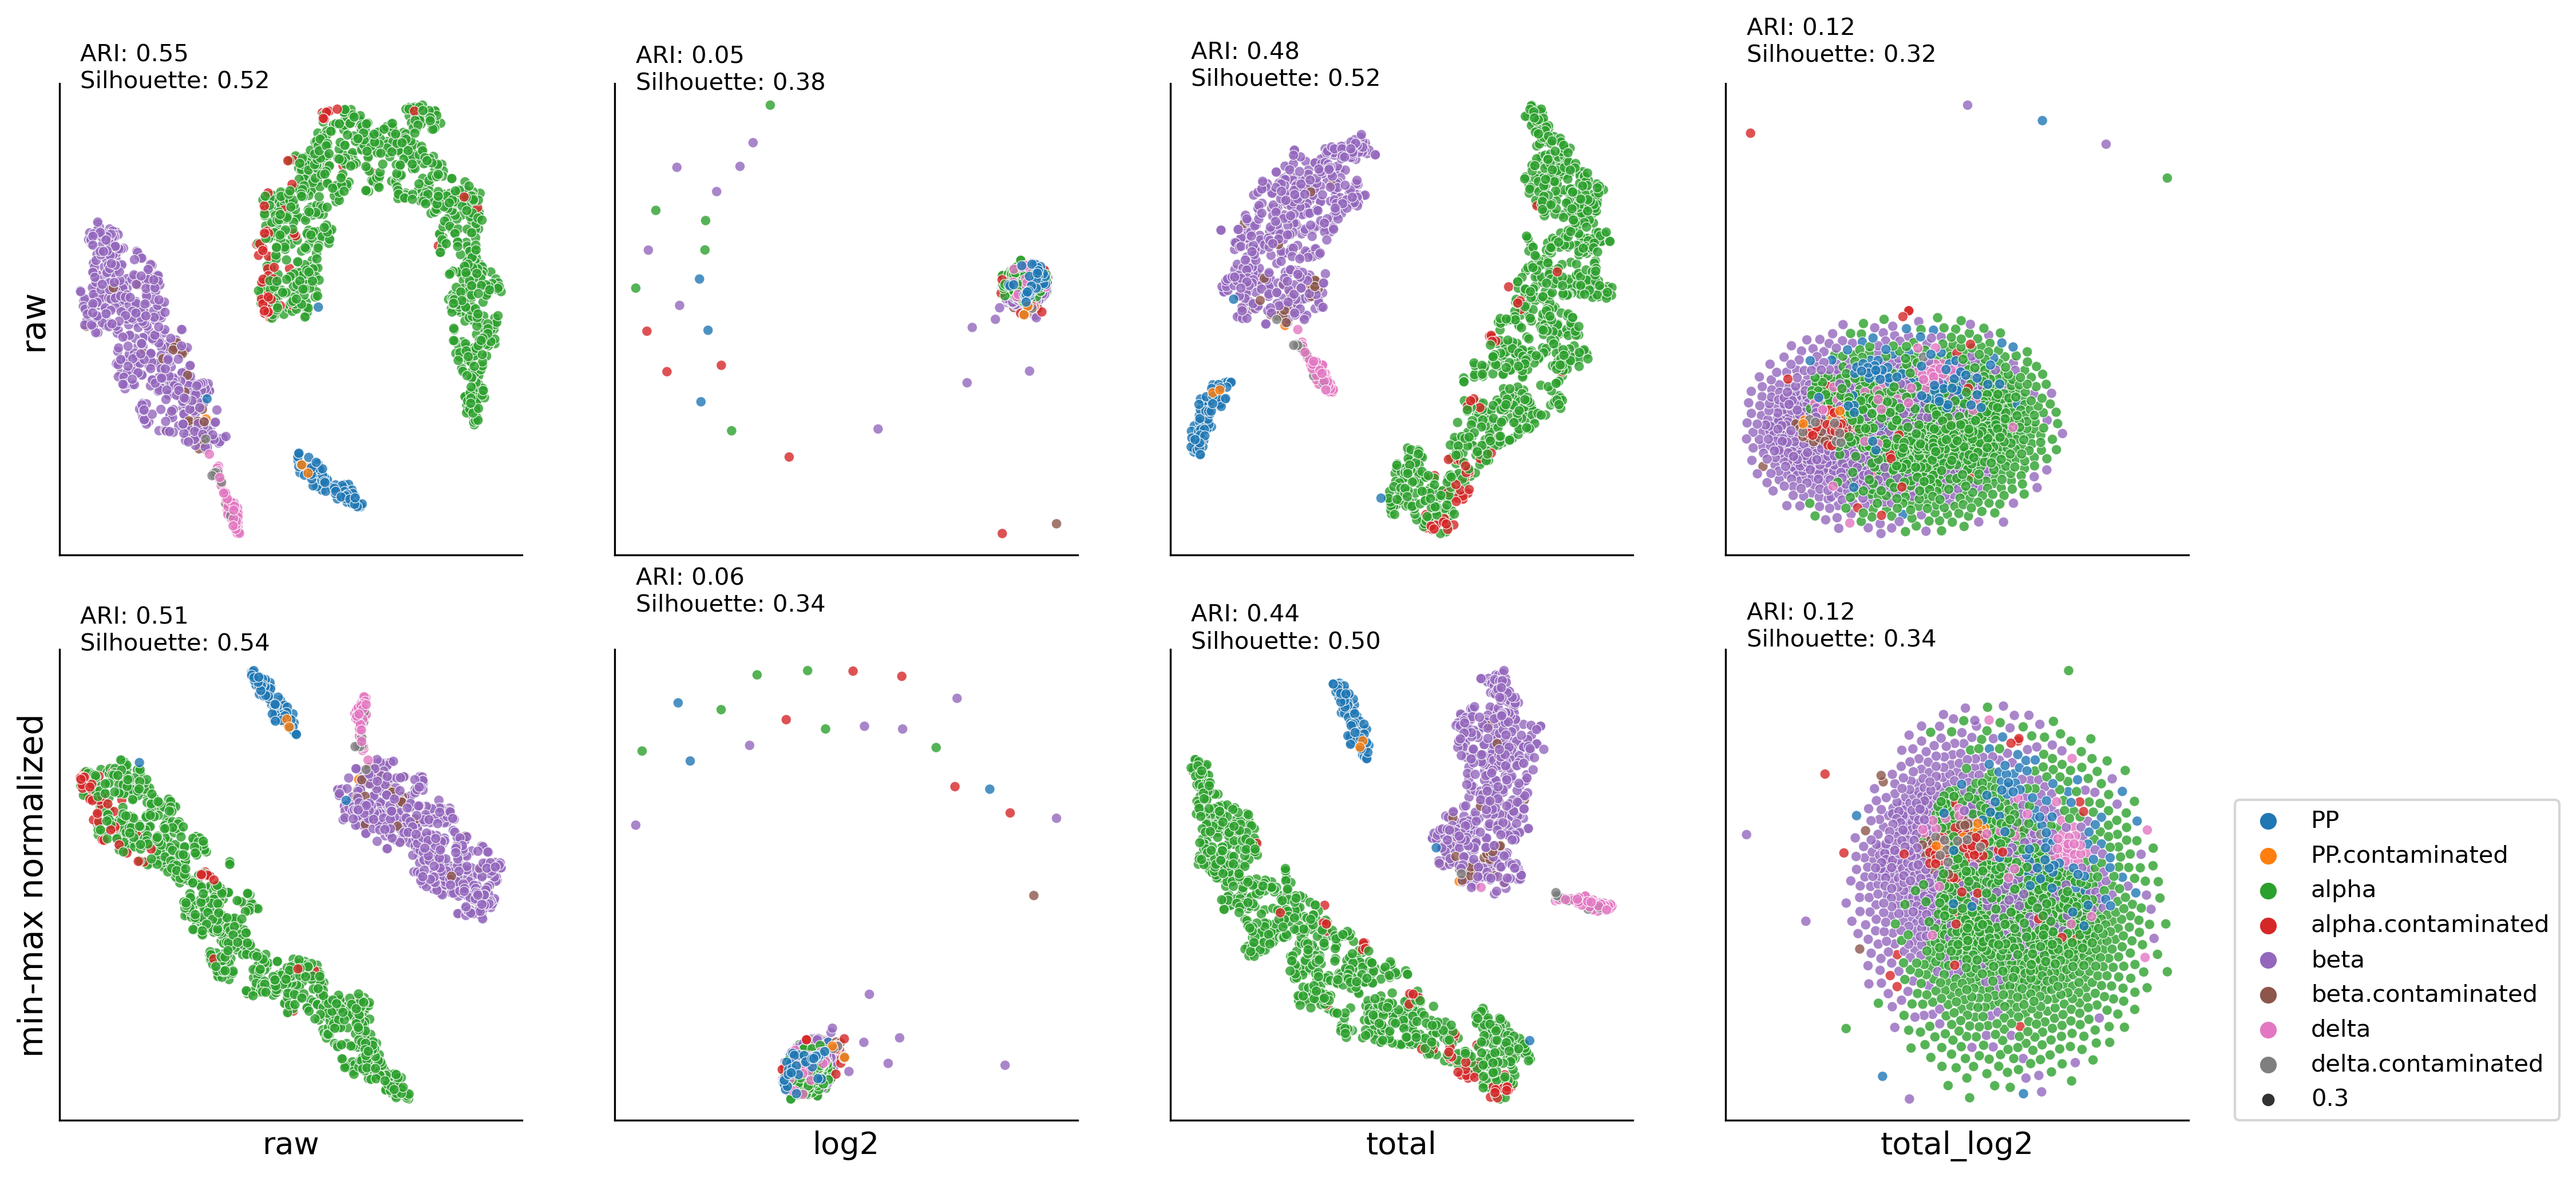

In [4]:
plt.figure(figsize=(16,8), dpi=300)
ax00 = plt.subplot2grid((2,4), (0,0)) 
ax10 = plt.subplot2grid((2,4), (0,1))  
ax20 = plt.subplot2grid((2,4), (0,2))  
ax30 = plt.subplot2grid((2,4), (0,3))  

ax01 = plt.subplot2grid((2,4), (1,0)) 
ax11 = plt.subplot2grid((2,4), (1,1))  
ax21 = plt.subplot2grid((2,4), (1,2))  
ax31 = plt.subplot2grid((2,4), (1,3))  

my_u.draw_plot(raw_df, raw_result, ax00, labels)
my_u.draw_plot(log2_df, log2_result, ax10, labels)
my_u.draw_plot(total_df, total_result, ax20, labels)
my_u.draw_plot(total_log2_df, total_log2_result, ax30, labels)
my_u.draw_plot(mm_raw_df, mm_raw_result, ax01, labels)
my_u.draw_plot(mm_log2_df, mm_log2_result, ax11, labels)
my_u.draw_plot(mm_total_df, mm_total_result, ax21, labels)
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax31, labels)

ax00.set_ylabel('raw' , fontsize=14)

ax01.set_xlabel('raw', fontsize=13)
ax11.set_xlabel('log2', fontsize=13)
ax21.set_xlabel('total', fontsize=13)
ax31.set_xlabel('total_log2', fontsize=13)
ax01.set_ylabel('min-max normalized' , fontsize=14)
ax31.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)